<a href="https://colab.research.google.com/github/rubbims/Geodataframes/blob/main/Geodataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>



<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/GeoDataFrame_SpatialOperation/blob/main/GeoDF_Operations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# TAREA CALIFICADA - GEODATAFRAMES



# Exercise 1
<div class="alert-success">

1. Follow the same steps in this last section to plot three maps of one country. Do not use Brazil.
2. Plot your three layers.
    
</div>

In [ ]:
#importing useful libs
import geopandas as gpd
from  fiona import listlayers
import requests
import pandas as pd

In [ ]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [ ]:
countries=gpd.read_file(linkWorldMap,layer='countries')

In [ ]:
denmark=countries[countries.COUNTRY=='Denmark']

In [ ]:
DenmarkBoundariesUrl="https://github.com/rubbims/Geodataframes/raw/main/maps/kontur_boundaries_DK_20230628.gpkg"
boundaries=gpd.read_file(DenmarkBoundariesUrl)

In [ ]:
DenmarkSeaportsUrl = "https://github.com/rubbims/Geodataframes/raw/main/maps/hotosm_dnk_sea_ports.gpkg"
seaports = gpd.read_file(DenmarkSeaportsUrl)

In [ ]:
DenmarkRailwaysUrl = "https://github.com/rubbims/Geodataframes/raw/main/maps/hotosm_dnk_railways.gpkg"
railways = gpd.read_file(DenmarkRailwaysUrl)

In [ ]:
DenmarkAirportsUrl = "https://github.com/rubbims/Geodataframes/raw/main/maps/hotosm_dnk_airports.gpkg"
airports=gpd.read_file(DenmarkAirportsUrl)

In [ ]:
boundaries_clipped = gpd.clip(gdf=boundaries,
                          mask=denmark)
seaports_clipped = gpd.clip(gdf=seaports,
                          mask=denmark)
railways_clipped = gpd.clip(gdf=railways,
                               mask=denmark)
airports_clipped = gpd.clip(gdf=airports,
                               mask=denmark)

<Axes: >

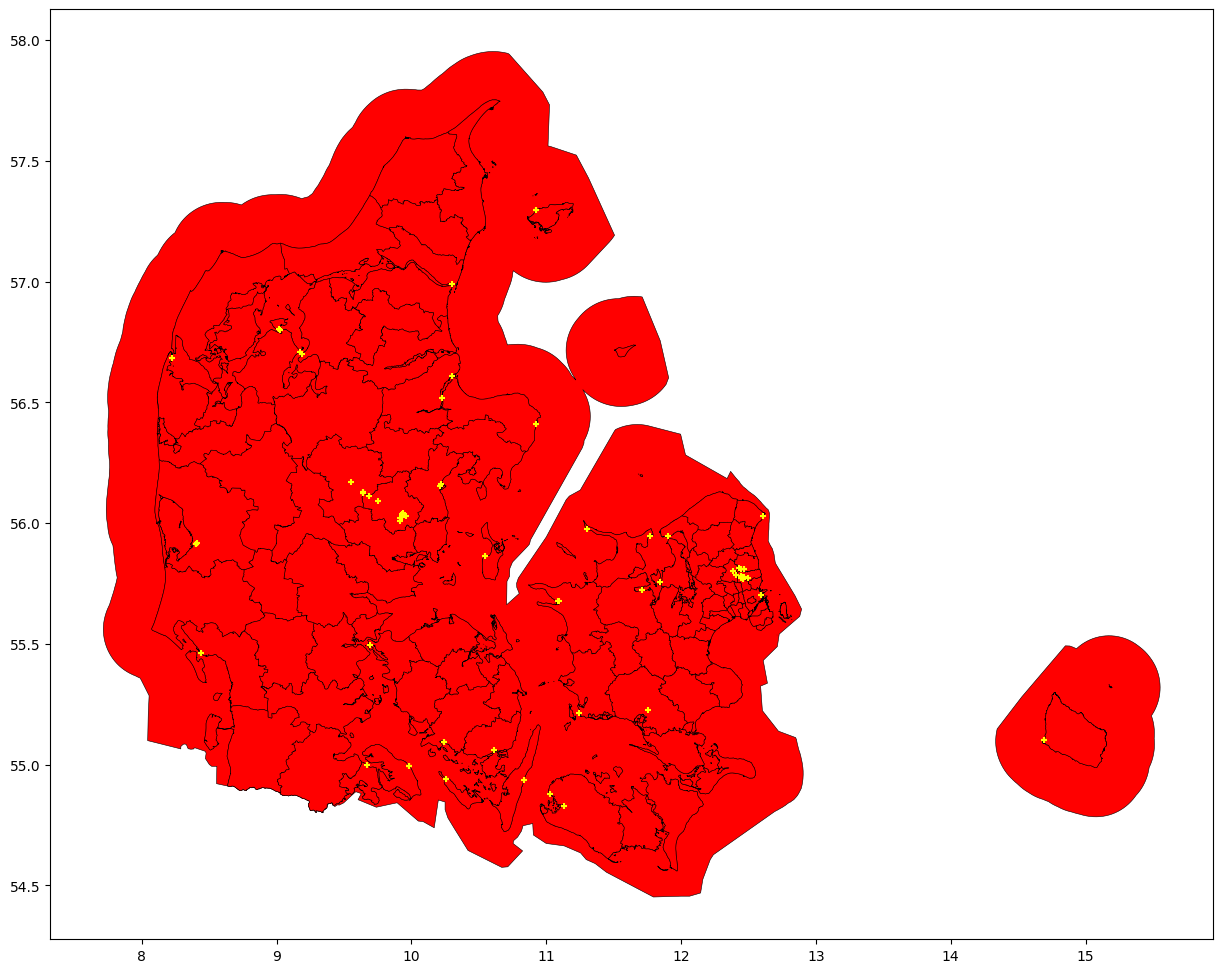

In [ ]:
#map of seaports
base = boundaries.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
seaports_clipped.plot(marker='+', color='yellow', markersize=15,
                    ax=base)

<Axes: >

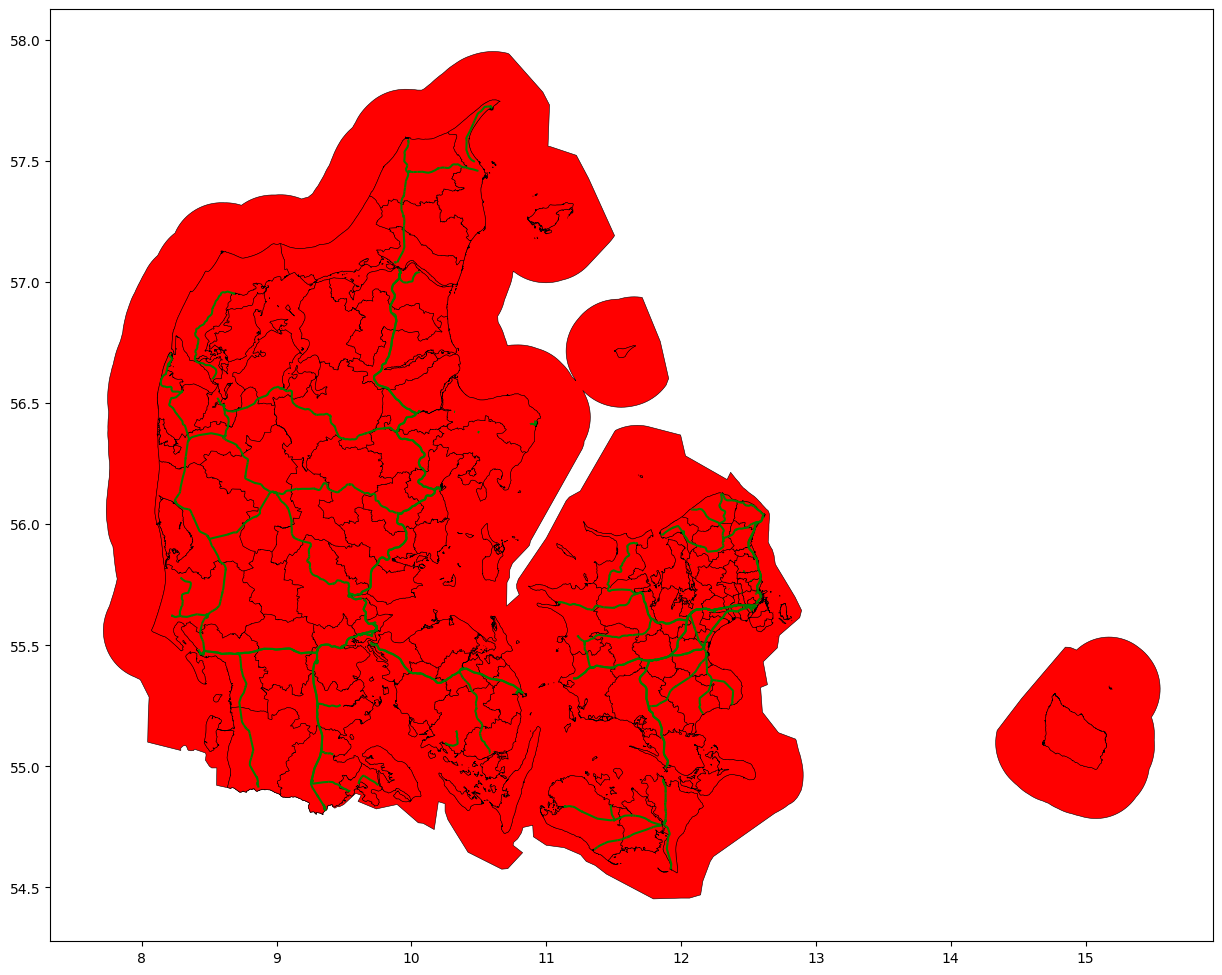

In [ ]:
#map of railways
base = boundaries.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
railways_clipped.plot(marker='+', color='green', markersize=15,
                    ax=base)

<Axes: >

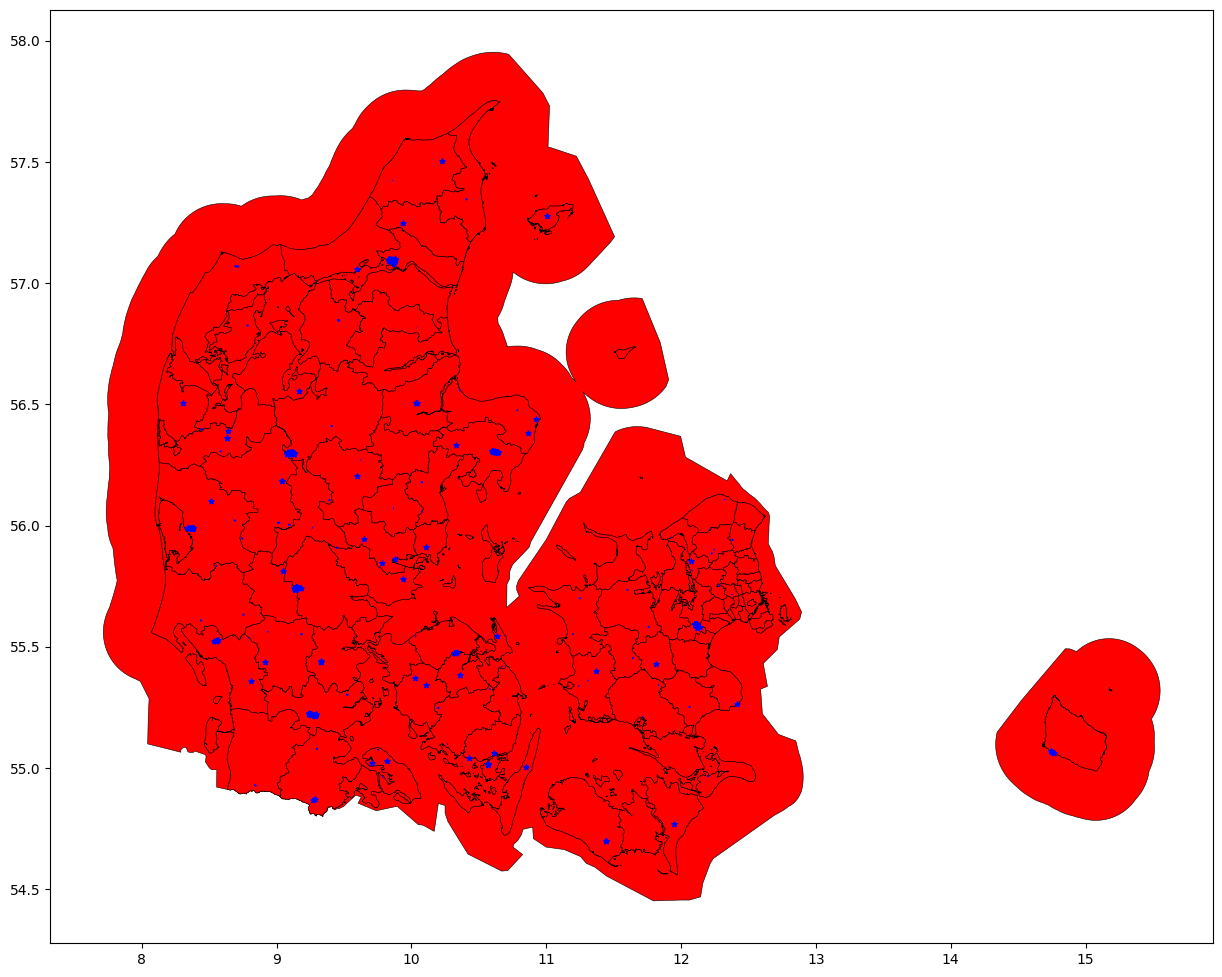

In [ ]:
#map of airports
base = boundaries.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
airports_clipped.plot(marker='*', color='blue', markersize=15,
                    ax=base)

# Exercise 2
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers
    
</div>

In [ ]:
denmark.crs.is_projected

False

In [ ]:
denmark.centroid
#so, we need to re-project

<ipython-input-136-0eda7ecc094f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  denmark.centroid


55    POINT (10.04630 55.96340)
dtype: geometry

In [ ]:
#we choose 4096 since its widely adpted in Europe
denmark.to_crs(4096).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
#true centroid
denmark.to_crs(4096).centroid

55    POINT (491579.011 1214846.509)
dtype: geometry

<Axes: >

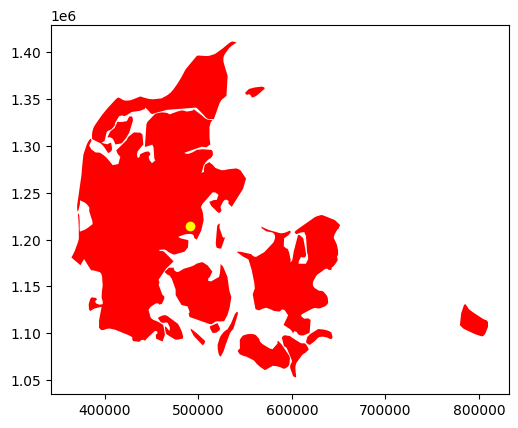

In [ ]:
#as we can see the centroid is on the projected map
base4096=denmark.to_crs(4096).plot(color='red')
denmark.to_crs(4096).centroid.plot(color='yellow',ax=base4096)

In [ ]:
#we commit the projected ver of each layer
denmark_4096=denmark.to_crs(4096)
seaports_denmark_4096=seaports_clipped.to_crs(denmark_4096.crs)
railways_denmark_4096=railways_clipped.to_crs(denmark_4096.crs)
airports_denmark_4096=airports_clipped.to_crs(denmark_4096.crs)

<Axes: >

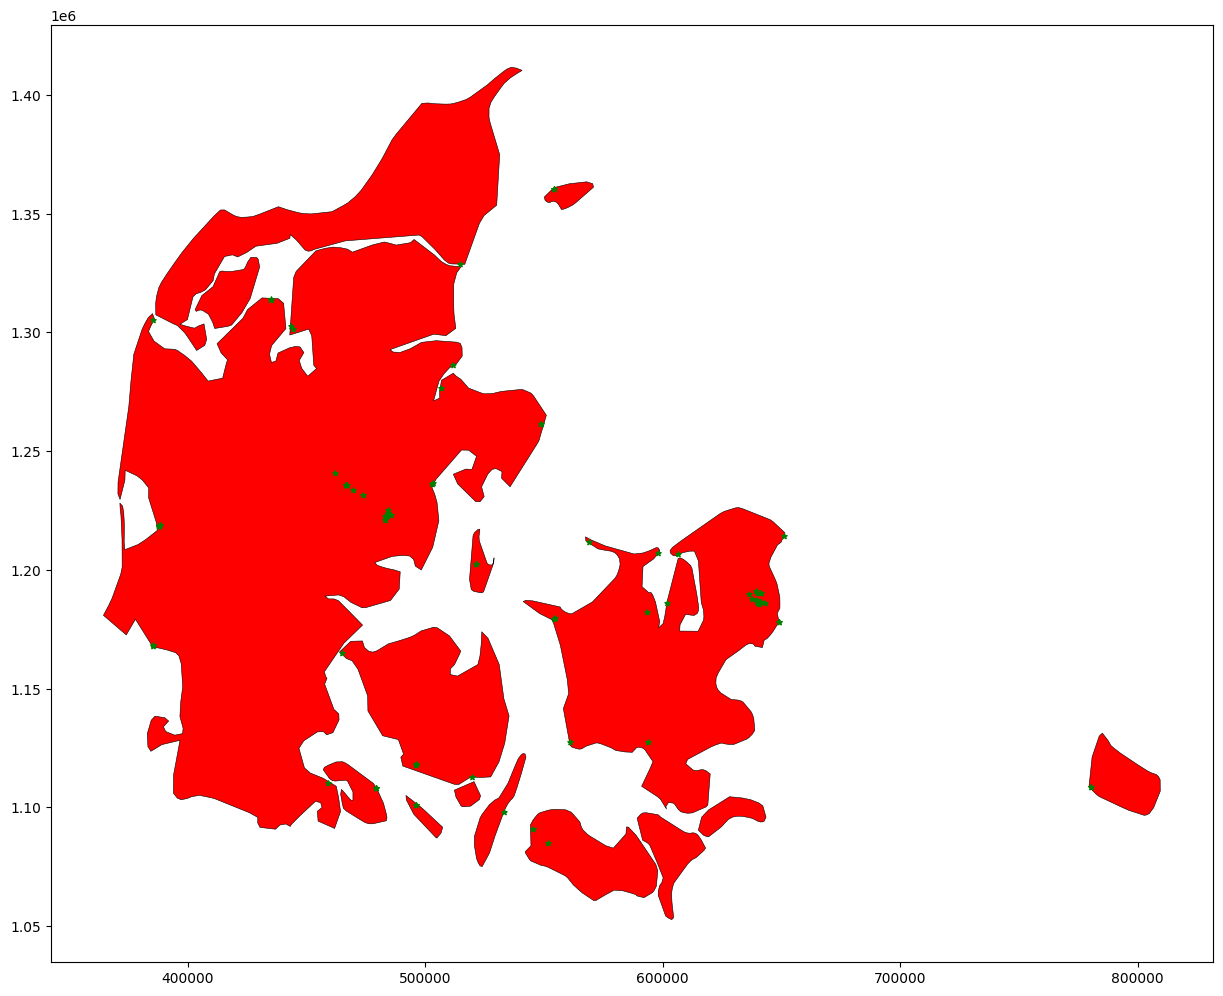

In [ ]:
#replotting seaports
base = denmark_4096.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
seaports_denmark_4096.plot(marker='*', color='green', markersize=15,
                    ax=base)

<Axes: >

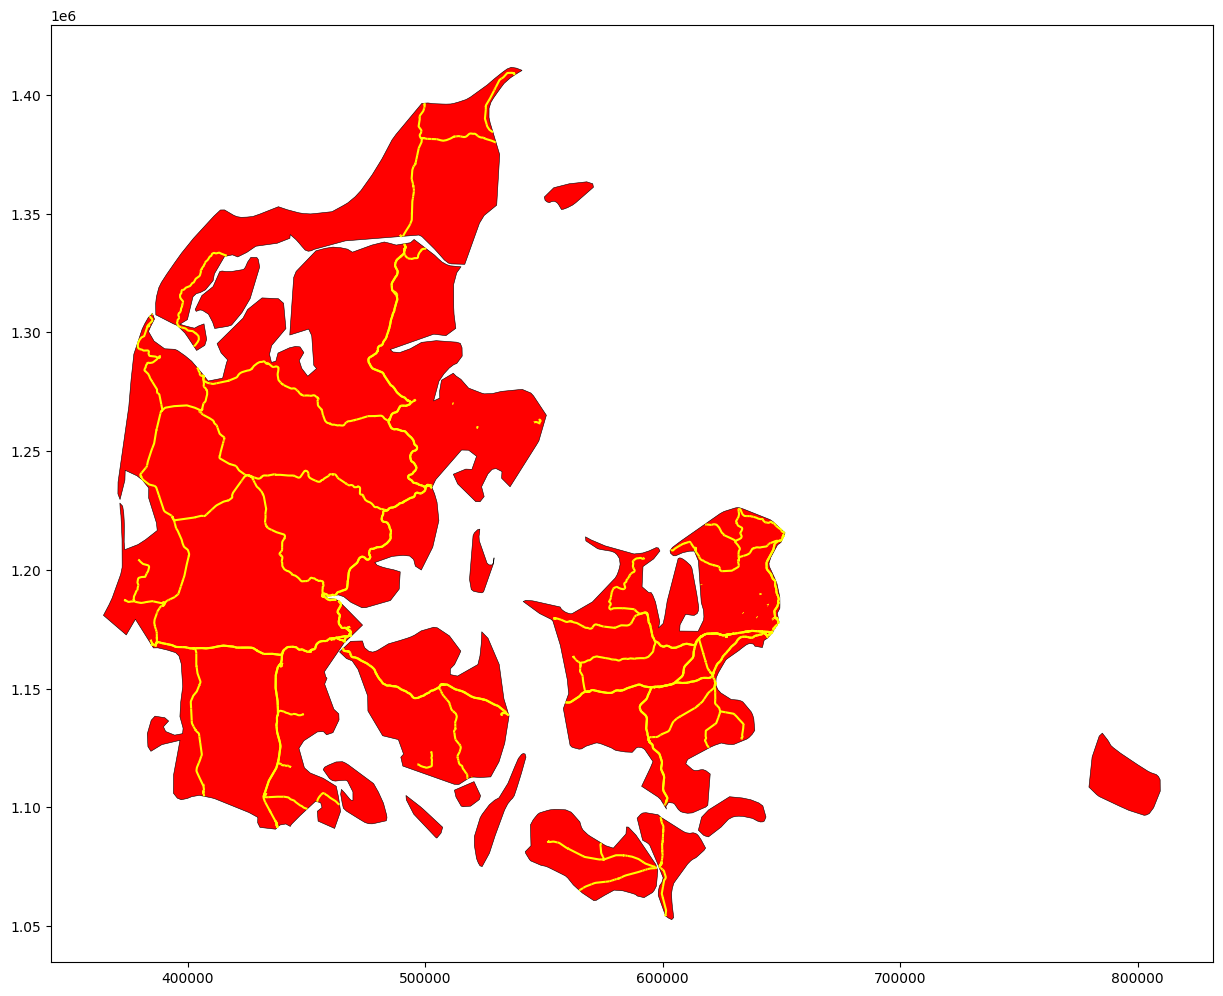

In [ ]:
#replotting railways
base = denmark_4096.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
railways_denmark_4096.plot(marker='.', color='yellow', markersize=15,
                    ax=base)

<Axes: >

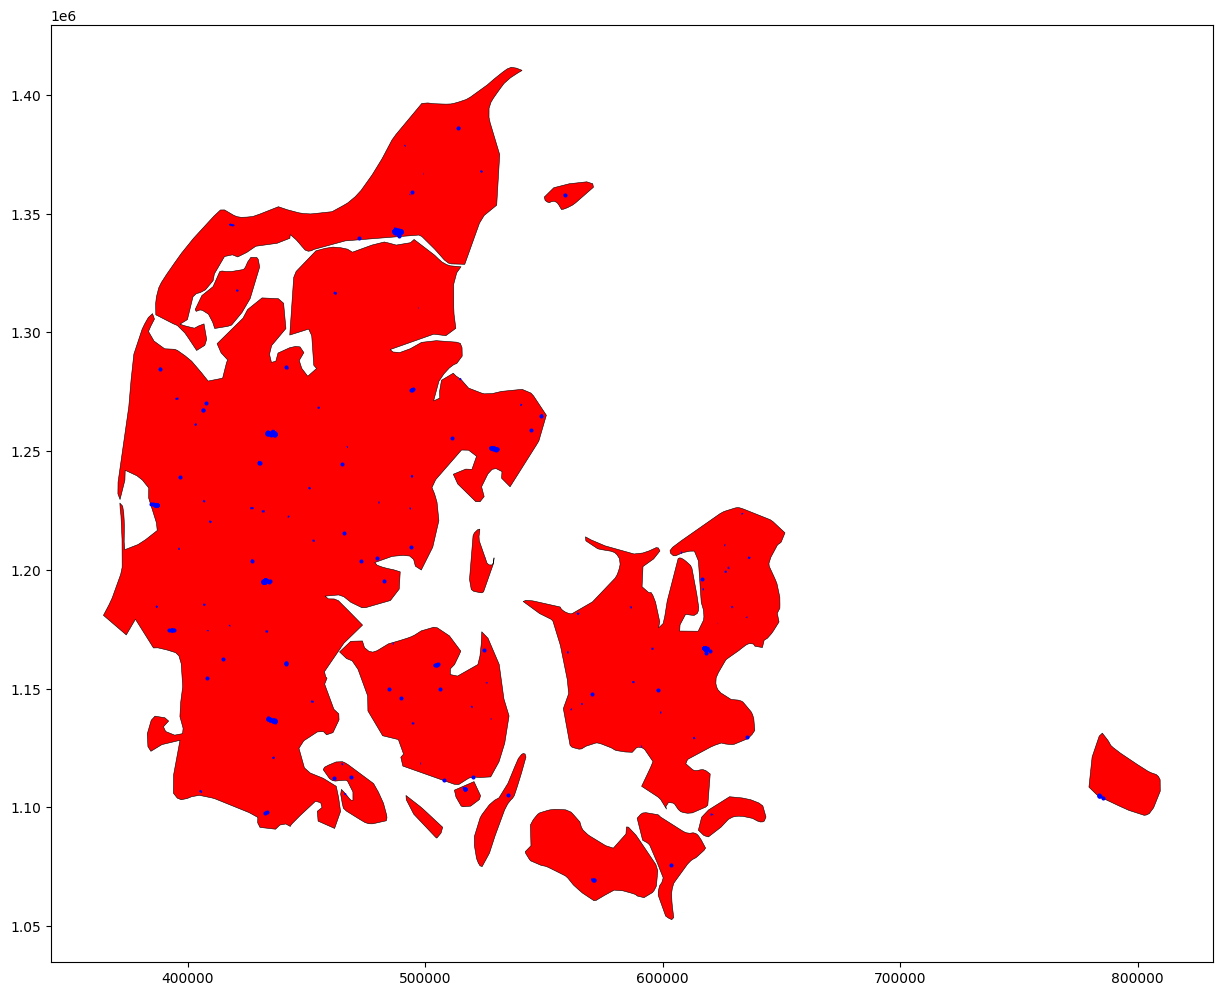

In [ ]:
#replotting airports
base = denmark_4096.plot(facecolor="red", edgecolor='black', linewidth=0.4,figsize=(15,15))
airports_denmark_4096.plot(marker='.', color='blue', markersize=15,
                    ax=base)

In [ ]:
#lets save the projected ver of each layer into gpkg
denmark_4096.to_file("denmark4096.gpkg", driver="GPKG")
seaports_denmark_4096.to_file("seaports4096.gpkg", driver="GPKG")
railways_denmark_4096.to_file("railways4096.gpkg", driver="GPKG")
airports_denmark_4096.to_file("airports4096.gpkg", driver="GPKG")

# Exercise 3
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

In [ ]:
import pandas as pd

In [ ]:
#reading denmark airports csv
airports_url = "https://github.com/rubbims/Geodataframes/raw/main/data/dk-airports.csv"
dm_airports = pd.read_csv(airports_url)
# some rows
dm_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2542,EKCH,large_airport,Copenhagen Kastrup Airport,55.617901,12.656000,17.0,EU,Denmark,DK,...,Copenhagen,1,EKCH,CPH,NaN,http://www.cph.dk/en/,https://en.wikipedia.org/wiki/Copenhagen_Airport,"København, Malmö",1020075,2015-09-19T15:12:02+00:00
1,2541,EKBI,large_airport,Billund Airport,55.740496,9.160452,247.0,EU,Denmark,DK,...,Billund,1,EKBI,BLL,NaN,http://www.billund-airport.dk/?sc_lang=en,https://en.wikipedia.org/wiki/Billund_Airport,NaN,1275,2023-12-04T15:48:16+00:00
2,2562,EKYT,medium_airport,Aalborg Airport,57.094763,9.849930,10.0,EU,Denmark,DK,...,Aalborg,1,EKYT,AAL,NaN,http://www.aal.dk,https://en.wikipedia.org/wiki/Aalborg_Airport,NaN,750,2023-12-04T15:44:41+00:00
3,2540,EKAH,medium_airport,Aarhus Airport,56.303331,10.618286,82.0,EU,Denmark,DK,...,Aarhus,1,EKAH,AAR,NaN,http://www.aar.dk/default.asp?id=87,https://en.wikipedia.org/wiki/Aarhus_Airport,NaN,750,2021-10-06T16:42:48+00:00
4,2551,EKRK,medium_airport,Copenhagen Roskilde Airport,55.585602,12.131400,146.0,EU,Denmark,DK,...,Copenhagen,1,EKRK,RKE,NaN,NaN,https://en.wikipedia.org/wiki/Roskilde_Airport,København,575,2024-04-06T20:51:02+00:00


In [ ]:
#we keep the same columns as the example
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
dm_airports=dm_airports.loc[:,keep]
dm_airports.info()
#latitude,longitude and elevation are already numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           138 non-null    object 
 1   type           138 non-null    object 
 2   latitude_deg   138 non-null    float64
 3   longitude_deg  138 non-null    float64
 4   elevation_ft   59 non-null     float64
 5   region_name    138 non-null    object 
 6   municipality   95 non-null     object 
dtypes: float64(3), object(4)
memory usage: 7.7+ KB


In [ ]:
#Reserved names must not be used, lets rename type
dm_airports.rename(columns={'type':'kind'},inplace=True)
dm_airports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality
0,Copenhagen Kastrup Airport,large_airport,55.617901,12.656000,17.0,Capital Region,Copenhagen
1,Billund Airport,large_airport,55.740496,9.160452,247.0,South Denmark,Billund
2,Aalborg Airport,medium_airport,57.094763,9.849930,10.0,North Jutland,Aalborg
3,Aarhus Airport,medium_airport,56.303331,10.618286,82.0,Central Jutland,Aarhus
4,Copenhagen Roskilde Airport,medium_airport,55.585602,12.131400,146.0,Zealand,Copenhagen


In [ ]:
#lets reproject all layer including new one
#we use 25832 since is commonly used in the north of europe
airportscsv=airports.to_crs(25832)
denmark_25832=denmark_4096.to_crs(25832)
seaports_denmark_25832=seaports_denmark_4096.to_crs(denmark_25832.crs)
railways_denmark_25832=railways_denmark_4096.to_crs(denmark_25832.crs)
airports_denmark_25832=airports_denmark_4096.to_crs(denmark_25832.crs)

<Axes: >

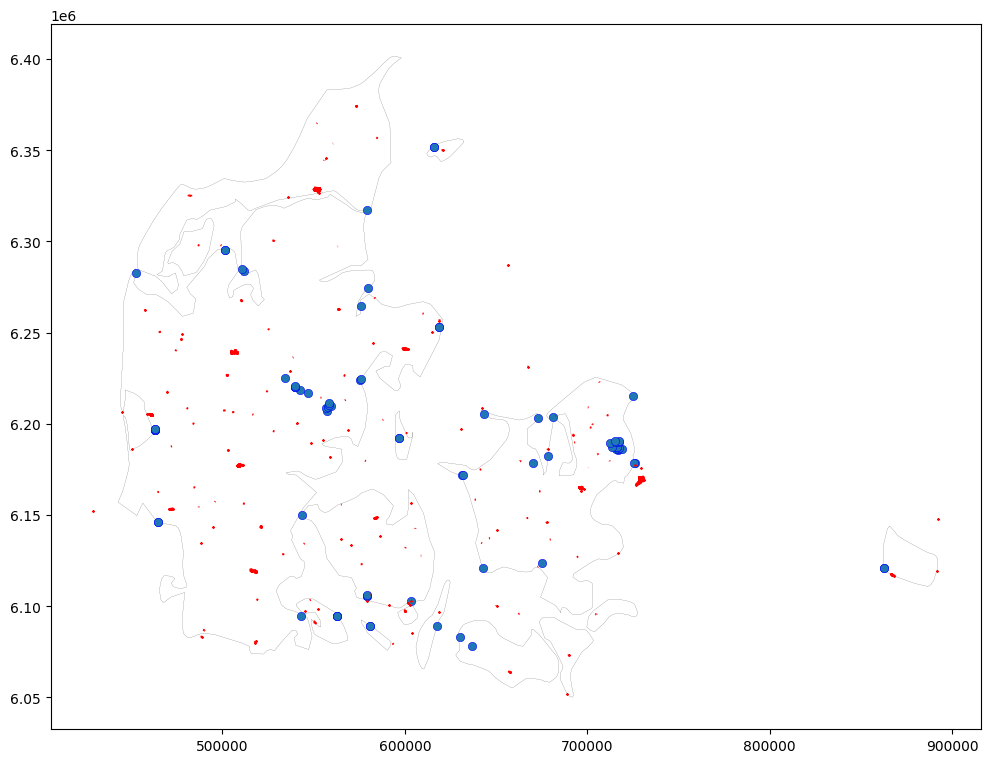

In [ ]:
#replotting seaports w airportscsv on top
base = denmark_25832.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
seaports_denmark_25832.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
airportscsv.plot(marker='*', color='red', markersize=1,alpha=1,
            ax=base)

<Axes: >

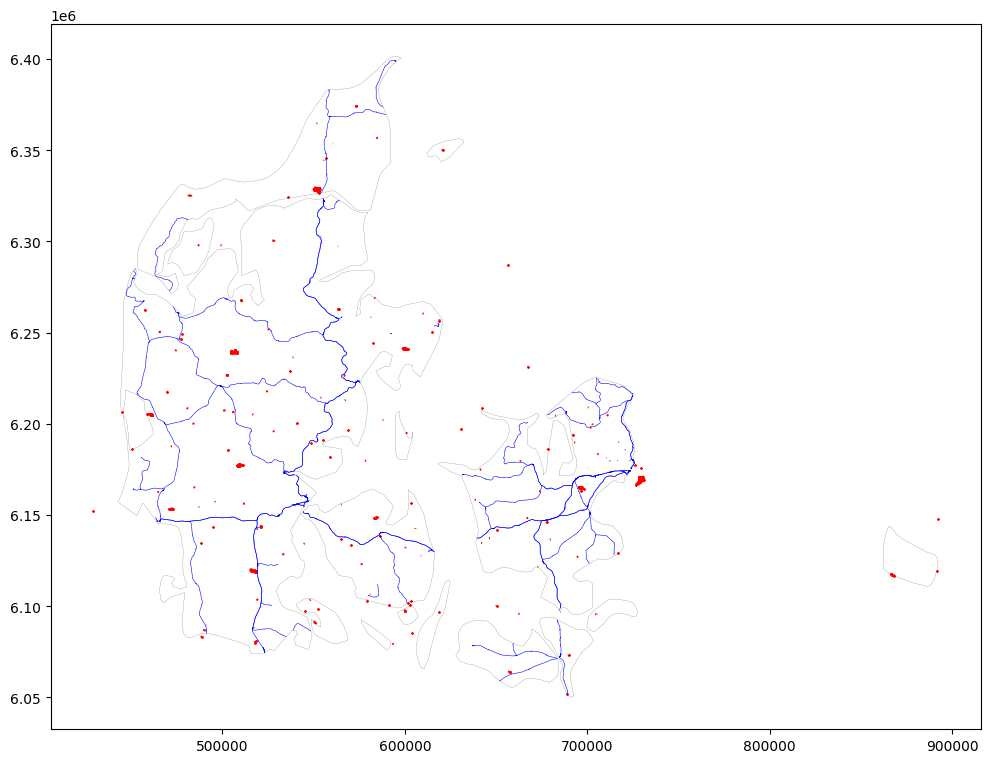

In [ ]:
#replotting railways w airportscsv on top
base = denmark_25832.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
railways_denmark_25832.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
airportscsv.plot(marker='*', color='red', markersize=1,alpha=1,
            ax=base)

<Axes: >

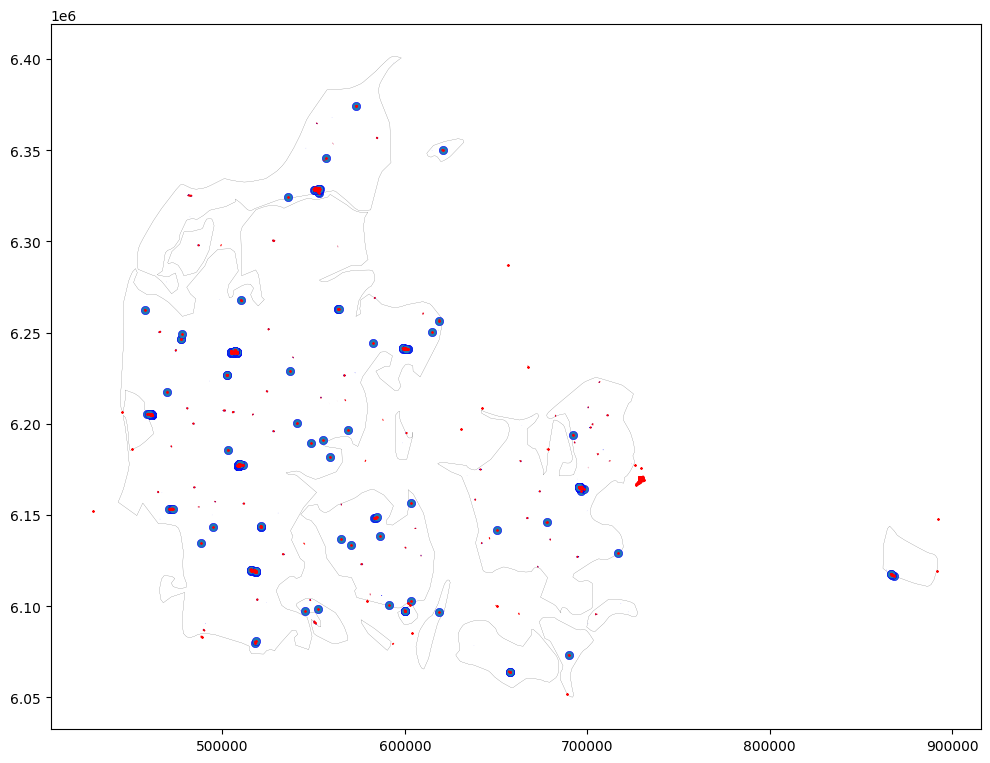

In [ ]:
#replotting airports w airportscsv on top
base = denmark_25832.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
airports_denmark_25832.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
airportscsv.plot(marker='*', color='red', markersize=1,alpha=1,
            ax=base)
#airportscsv has more info than our layer

# Exercise 4

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

In [ ]:
denmark_25832
#is a multipolygon

,COUNTRY,geometry
55,Denmark,"MULTIPOLYGON (((464205.349 6281709.969, 465896..."


<Axes: >

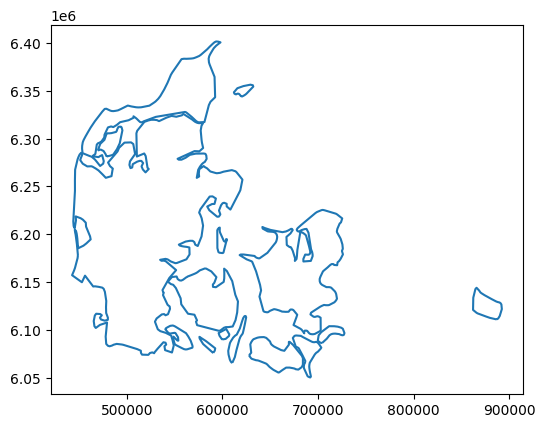

In [ ]:
# Getting the border lines from denmark25832
denmark_25832.boundary.plot()

In [ ]:
type(denmark_25832.boundary)
#we got geoseries

geopandas.geoseries.GeoSeries

In [ ]:
#lets transform it to geodf
denmark_25832.boundary.to_frame()

,0
55,"MULTILINESTRING ((464205.349 6281709.969, 4658..."


In [ ]:
#lets transform it to geodf
borderdm=denmark_25832.boundary.to_frame()
#name of country
borderdm['name']='Denmark'
#renaming geometry column
borderdm.rename(columns={0:'geometry'},inplace=True)
#setting geometry columns
borderdm = borderdm.set_geometry("geometry")
# verifying:
borderdm

,geometry,name
55,"MULTILINESTRING ((464205.349 6281709.969, 4658...",Denmark
